# Singular Value decomposition(SVD)

The SVD from scratch will be updated later.

Firstly, we will use the SVD from numpy, to do SVD on the matrix $A$ in the classnote.
$$ A=\begin{pmatrix}
1 & 0 & 0 & 0 &  \\
0 & 0 & 0 & 4 &  \\
0 & 3 & 0 & 0 &  \\
0 & 0 & 0 & 0 &  \\
2 & 0 & 0 & 0 &  \\
\end{pmatrix}
$$

In [1]:
import numpy as np

c:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
c:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
A=np.array([[1,0,0,0],
            [0,0,0,4],
            [0,3,0,0],
            [0,0,0,0],
            [2,0,0,0]])  


In [3]:
#U,s,V = np.linalg.svd(A,full_matrices=True)
U,s,V = np.linalg.svd(A)

In [4]:
U

array([[ 0.        ,  0.        , -0.4472136 ,  0.        , -0.89442719],
       [-1.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        , -1.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  1.        ,  0.        ],
       [ 0.        ,  0.        , -0.89442719,  0.        ,  0.4472136 ]])

In [5]:
s

array([ 4.        ,  3.        ,  2.23606798, -0.        ])

In [6]:
V

array([[-0., -0., -0., -1.],
       [-0., -1., -0., -0.],
       [-1., -0., -0., -0.],
       [-0., -0., -1., -0.]])

Next, let's do SVD on an image!

In [7]:
from PIL import Image
imagePath='./data/loxy_1.png'

img2=Image.open(imagePath)
print("img2:",img2)
print("img2:",type(img2))
#转换成np.ndarray格式
img2=np.array(img2)
print("img2:",img2.shape)
print("img2:",type(img2))

img2: <PIL.PngImagePlugin.PngImageFile image mode=RGB size=1920x1080 at 0x2B6FE37D070>
img2: <class 'PIL.PngImagePlugin.PngImageFile'>
img2: (1080, 1920, 3)
img2: <class 'numpy.ndarray'>


In [8]:
U,s,V = np.linalg.svd(img2[:,:,0].squeeze())

In [9]:
U.shape,s.shape,V.shape

((1080, 1080), (1080,), (1920, 1920))

In [12]:
num_imgs=np.zeros((1080,1080,1920))
reversed_img = np.zeros((1080,1920))
for i in range(1080):
    reversed_img +=s[i]*np.dot(U[:,i].reshape(1080,-1),V[i,:].reshape(-1,1920))
    num_imgs[i]=reversed_img

In [14]:
num_imgs_list = [num_imgs[i] for i in range(1080)]

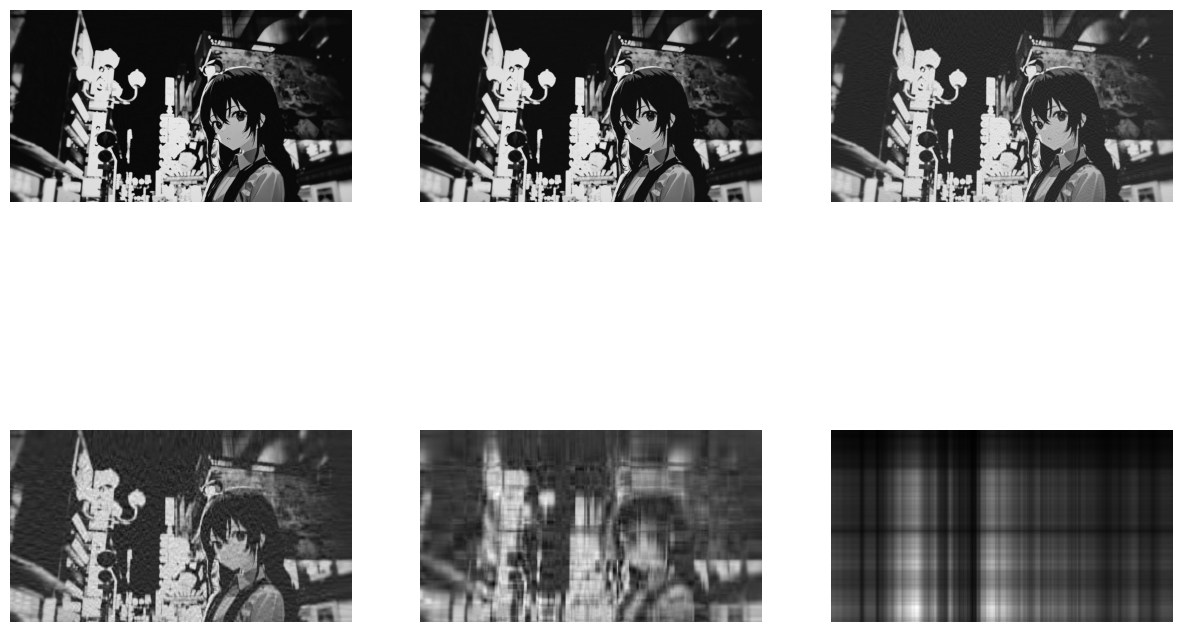

In [34]:
percent = [1.0,0.5,0.1,0.05,0.02,0.01]
from matplotlib import pyplot as plt
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
plt.axis('off')
plt.imshow(num_imgs_list[int(108*percent[0])-1],cmap='gray')
plt.subplot(2,3,2)
plt.axis('off')
plt.imshow(num_imgs_list[int(108*percent[1])-1],cmap='gray')
plt.subplot(2,3,3)
plt.axis('off')
plt.imshow(num_imgs_list[int(108*percent[2])-1],cmap='gray')
plt.subplot(2,3,4)
plt.axis('off')
plt.imshow(num_imgs_list[int(108*percent[3])-1],cmap='gray')
plt.subplot(2,3,5)
plt.axis('off')
plt.imshow(num_imgs_list[int(108*percent[4])-1],cmap='gray')
plt.subplot(2,3,6)
plt.axis('off')
plt.imshow(num_imgs_list[int(108*percent[5])-1],cmap='gray')

In [29]:
import imageio
num_imgs_list = [num_imgs[i] for i in range(1080) if i%10==0]
duration_per_image = 10.0/len(num_imgs_list)
with imageio.get_writer('./data/SVD_loxy_accelerated.gif',mode='I',duration=duration_per_image) as writer:
  for img in num_imgs_list:
    imgs_as_uint8=np.uint8(img)
    writer.append_data(imgs_as_uint8)

In [44]:
num_imgs_list = [num_imgs[i] for i in range(1080) if ((i%10==0)and(i<100)or (i%40==0)and(i>=100))]
duration_per_image = 40.0/len(num_imgs_list)
with imageio.get_writer('./data/ziped_SVD_loxy_accelerated.gif',mode='I',duration=duration_per_image) as writer:
  for img in num_imgs_list:
    imgs_as_uint8=np.uint8(img)
    writer.append_data(imgs_as_uint8)